### Extracting h5 data

Each .h5 files have 3 different groups, "FileType", "Frame", "Waveforms". Waveforms are the datafiles.

Inside Waveforms, we have 4 different channels, Channel 1 represents the the inverted peaks, Channel 2 and 4 are the "noise" (I think), and Channel 3 is the data we are interested in. 

In Channel 3, there are about 32 000 traces.

In [3]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.stats import poisson
import pandas as pd


In [2]:
def Plotting_All_Channels(your_file_path):
    with h5py.File(your_file_path, 'r') as h5_file:
        waveforms = h5_file['Waveforms']
        
        for channel in ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']:
            if channel in waveforms:
                plt.figure()
                for dataset in waveforms[channel]:
                    data = waveforms[channel][dataset][:]
                    plt.plot(data)
            else:
                print(f"{channel} not found in the Waveforms group")
    return


In [12]:
def Plotting_Single_Channel(your_file_path, Channel_Number):
    
    channel_name = 'Channel ' + str(Channel_Number)
    with h5py.File(your_file_path, 'r') as h5_file:
        waveforms = h5_file['Waveforms']
        print(waveforms)
        
        for channel in [channel_name]:
            if channel in waveforms:
                plt.figure()
                for dataset in waveforms[channel]:
                    data = waveforms[channel][dataset][:]
                    data = data - min(data)
                    plt.plot(data)
                print(data[0:100])
            else:
                print(f"{channel} not found in the Waveforms group")
    return

In [4]:
def Plot_Hist_Amplitudes(your_file_path, Channel_Number):
    channel_name = 'Channel ' + str(Channel_Number)
    with h5py.File(your_file_path, 'r') as h5_file:
        channel_data = h5_file['Waveforms'][channel_name]
        
        amplitude_data = []
        for dataset in channel_data:
            data = channel_data[dataset][:]
            amplitude_data.extend(data)
    amplitude_data = np.array(amplitude_data)
    plt.hist(amplitude_data, bins=1000, color= 'blue')
    
    return



In [5]:
def h5_to_csv(your_file_path, Channel_Number):
    channel_name = 'Channel ' + str(Channel_Number)
    csv_path = os.path.join(os.path.dirname(your_file_path), channel_name + 'data.csv')
    with h5py.File(your_file_path, 'r') as h5_file:
        channel_data = h5_file['Waveforms/' + channel_name]
        
    
        data_dict = {dataset_name: channel_data[dataset_name][:] for dataset_name in channel_data}
        
    
        df = pd.DataFrame(data_dict)
        df.to_csv(csv_path, index=False)
    

    print(f"CSV file saved at: {csv_path}")
    return

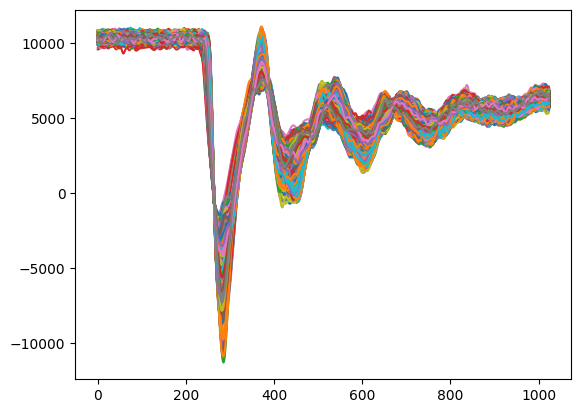

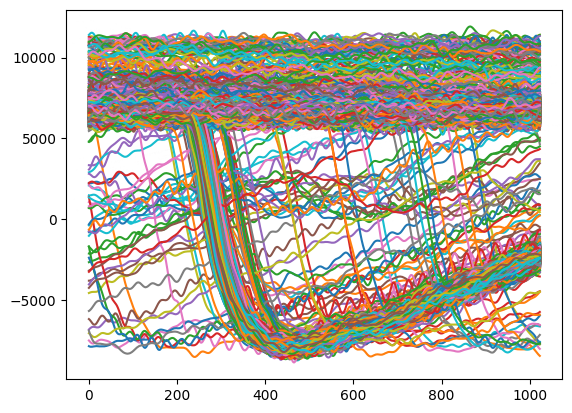

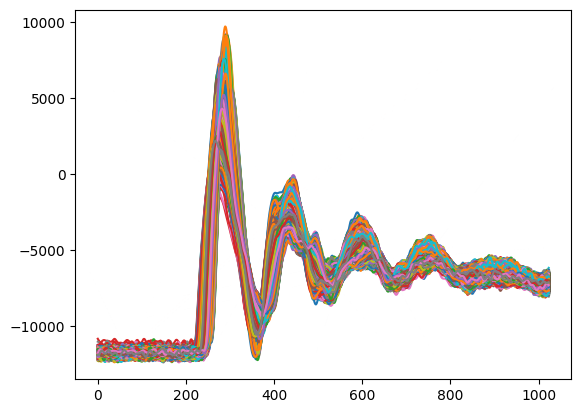

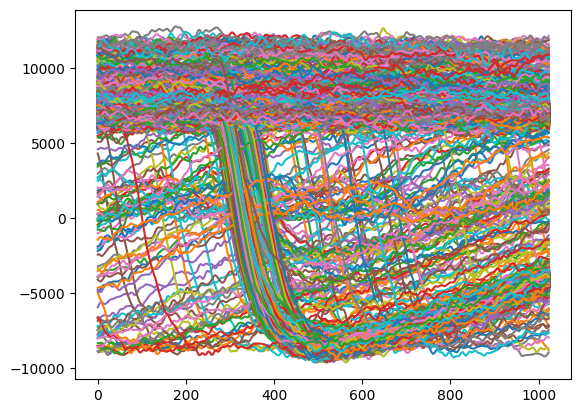

In [6]:
Plotting_All_Channels('/Users/gabriel/Code/Single Photon Detection/20.53.57_EDFA2_850mA/g2_PNR2binary_EDFA2_850mA_10.0uA_1of3.h5')

<HDF5 group "/Waveforms" (4 members)>
[136 120 124 148 192 248 308 364 404 424 420 400 364 316 268 232 212 208
 224 260 308 360 408 444 464 460 440 400 348 292 240 204 176 168 172 192
 216 240 260 276 276 268 244 216 180 144 112  88  72  68  80 100 136 180
 232 288 340 388 428 456 464 456 432 396 352 308 272 244 224 220 232 252
 276 296 312 320 312 296 268 240 208 184 168 160 164 172 188 208 220 232
 236 240 240 240 244 252 268 284 300 312]


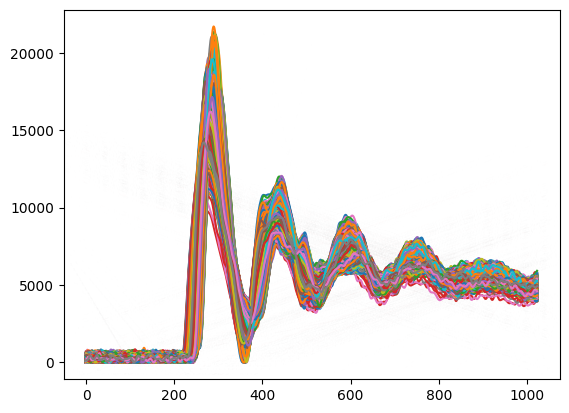

In [13]:
Plotting_Single_Channel('/Users/gabriel/Code/Single Photon Detection/20.53.57_EDFA2_850mA/g2_PNR2binary_EDFA2_850mA_10.0uA_1of3.h5', 3)

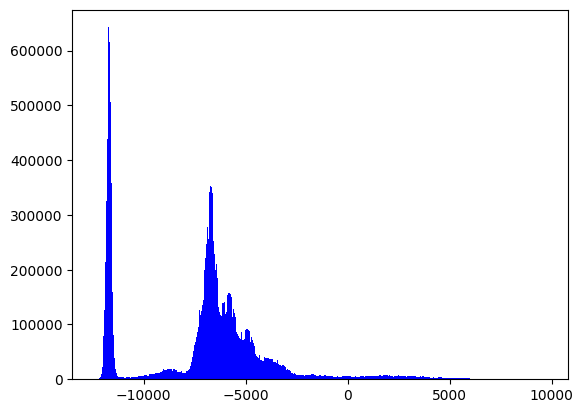

In [8]:
Plot_Hist_Amplitudes('/Users/gabriel/Code/Single Photon Detection/20.53.57_EDFA2_850mA/g2_PNR2binary_EDFA2_850mA_10.0uA_1of3.h5', 3)

In [23]:
def Plot_Hist_Amplitudes_Corrected(your_file_path, Channel_Number, segments, threshold, centered):
    
    channel_name = 'Channel ' + str(Channel_Number)
    with h5py.File(your_file_path, 'r') as h5_file:
        channel_data = h5_file['Waveforms'][channel_name]
        print(len(channel_data))
        amplitude_data = []

        for dataset in channel_data:
            
            data = channel_data[dataset][:]
            if centered == 1:
                data = data - min(data)
            
            amplitude_data.append(data)
       
            
    amplitude_data = np.array(amplitude_data)
    amplitude_data = np.sum(amplitude_data, axis=1)*1000
    print(amplitude_data.shape)
    print(amplitude_data[0:50])
    

    plt.figure(figsize=(10, 6))
    plt.hist(amplitude_data, bins=1000, color='blue')
    plt.xlabel("Amplitude (mV)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Amplitudes in {channel_name}")
    

    num_data_points = len(amplitude_data)
    segment_length = num_data_points // segments
    
    single_photon_count = 0
    multi_photon_count = 0
    
    for i in range(segments):
        segment_data = amplitude_data[i * segment_length:(i + 1) * segment_length]

        single_photon_count += np.sum(segment_data < threshold)
        multi_photon_count += np.sum(segment_data >= threshold)

    print(f"Single-photon count (<{threshold} mV): {single_photon_count}")
    print(f"Multi-photon count (≥{threshold} mV): {multi_photon_count}")
    print(len(amplitude_data))
    
    plt.show()

32768
(32768,)
[-7274688000 -7353552000 -7255356000 -7177432000 -7325044000 -7224960000
 -7241352000 -7179556000 -7210512000 -7236284000 -6810296000 -7262628000
 -7427044000 -7255300000 -6812628000 -7238836000 -7324548000 -7227096000
 -7337084000 -7288720000 -7304620000 -7207424000 -6936912000 -7236616000
 -7238764000 -7284700000 -7306460000 -7200580000 -7340184000 -6935080000
 -6862320000 -7182412000 -7217700000 -7256256000 -7376876000 -7317232000
 -7279196000 -7200532000 -6936156000 -7234572000 -7213264000 -7266468000
 -7248920000 -6902372000 -7251260000 -7293372000 -7374952000 -7296904000
 -7256356000 -7235736000]
Single-photon count (<52.5 mV): 32766
Multi-photon count (≥52.5 mV): 0
32768


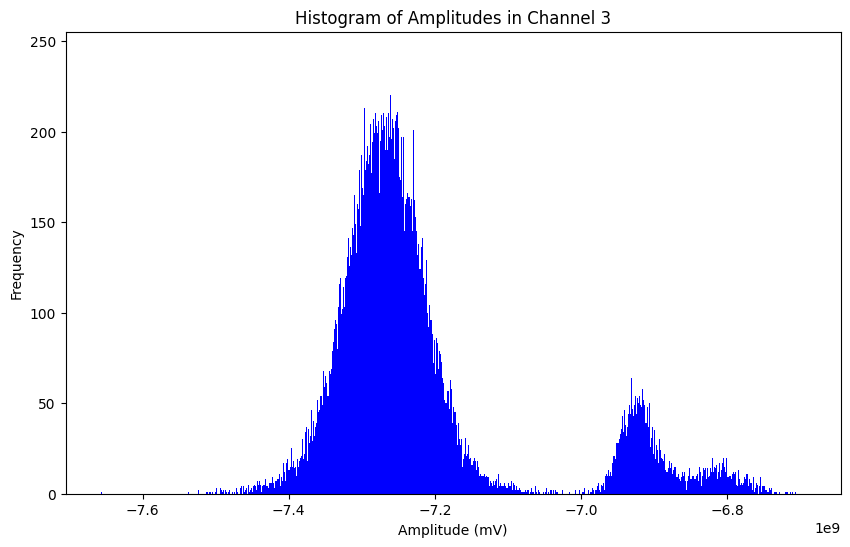

In [24]:
Plot_Hist_Amplitudes_Corrected('/Users/gabriel/Code/Single Photon Detection/20.53.57_EDFA2_850mA/g2_PNR2binary_EDFA2_850mA_10.0uA_1of3.h5', Channel_Number=3, segments=3, threshold=52.5, centered=0)

32768
[264 252 236 208 172 136  96  60  28   8   0   4  16  40  64  92 120 144
 164 180 192 200 204 208 208 212 216 220 220 224 224 224 224 220 220 216
 216 216 220 224 228 236 244 248 252 256 256 256 256 260]
Single-photon count (<52.5 mV): 330981
Multi-photon count (≥52.5 mV): 33223449
33554432


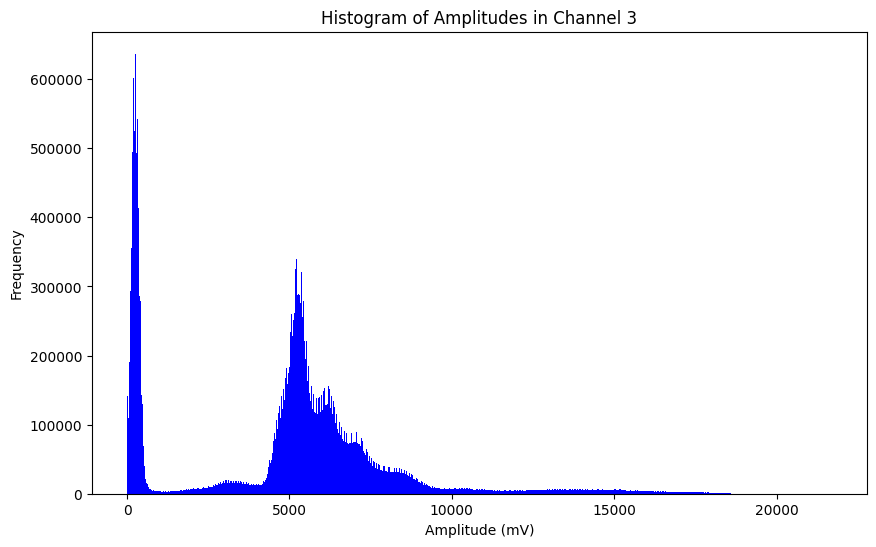

In [16]:
Plot_Hist_Amplitudes_Corrected('/Users/gabriel/Code/Single Photon Detection/20.53.57_EDFA2_850mA/g2_PNR2binary_EDFA2_850mA_10.0uA_2of3.h5', Channel_Number=3, segments=3, threshold=52.5)

32768
[-11664 -11676 -11692 ...  -7148  -7128  -7104]
Single-photon count (<52.5 mV): 32282123
Multi-photon count (≥52.5 mV): 1272307
33554432


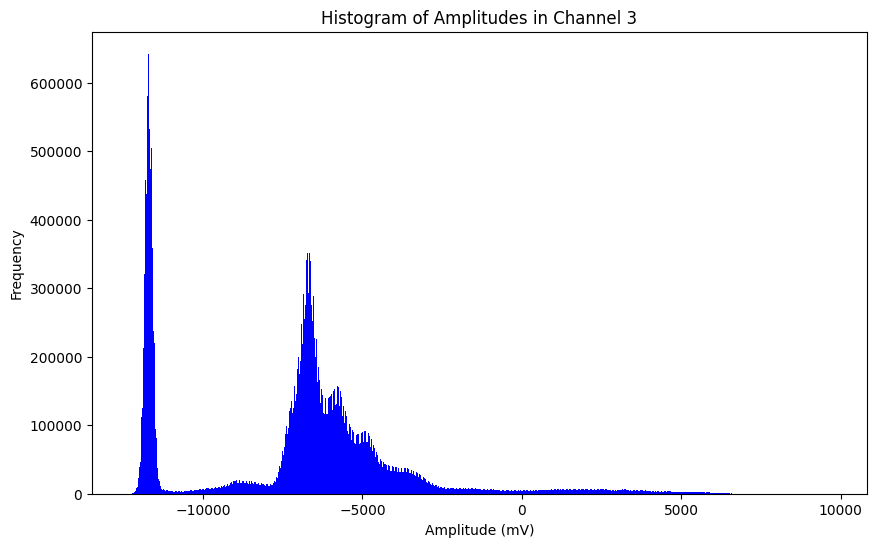

In [8]:
Plot_Hist_Amplitudes_Corrected('/Users/gabriel/Code/Single Photon Detection/20.53.57_EDFA2_850mA/g2_PNR2binary_EDFA2_850mA_10.0uA_3of3.h5', Channel_Number=3, segments=3, threshold=52.5)

32768
[-11828 -11860 -11892 ...  -7284  -7304  -7324]
Single-photon count (<52.5 mV): 32297723
Multi-photon count (≥52.5 mV): 1256707
33554432


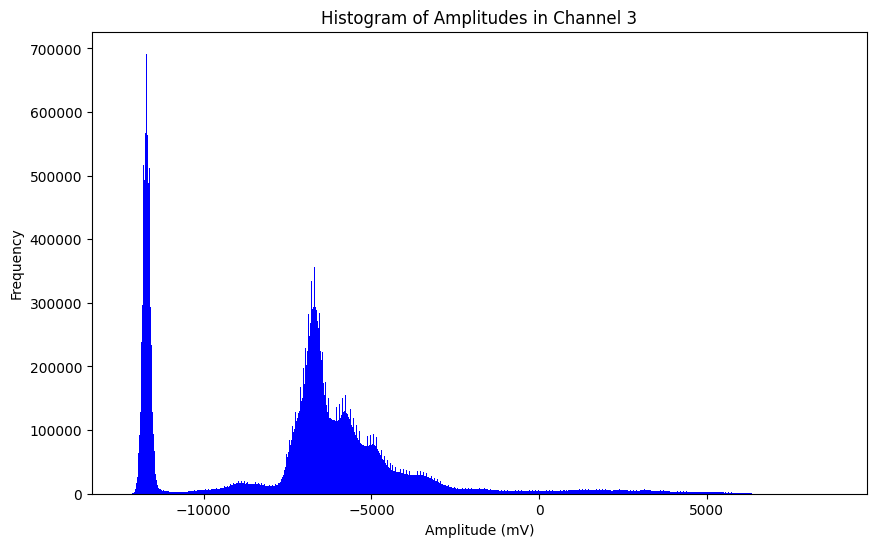

In [9]:
Plot_Hist_Amplitudes_Corrected('/Users/gabriel/Code/Single Photon Detection/19.36.28_EDFA2_551mA/g2_PNR2binary_EDFA2_551mA_10.0uA_1of3.h5', Channel_Number=3, segments=3, threshold=52.5)